In [1]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


# Traffic Volume Trends Over Time

This visualization shows the total traffic volume for each month.

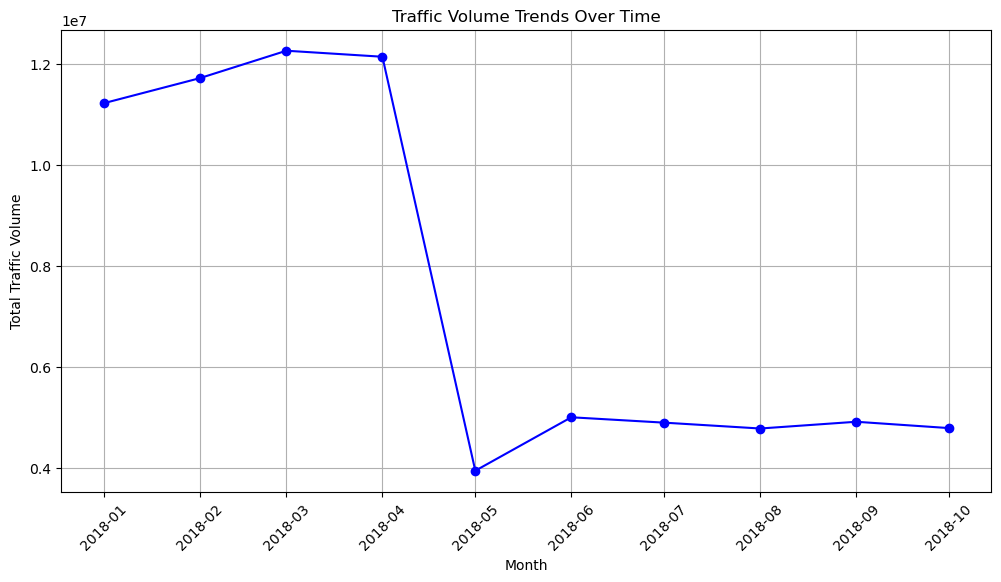

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data (Replace 'your_file.csv' with the actual file path)
df = pd.read_csv("detailed-traffic-pedestrian-volumes-2018/traffic_volumes_2018.csv", parse_dates=["datetime_bin"])

# Convert aggregation_period to datetime format
df["aggregation_period"] = pd.to_datetime(df["aggregation_period"], format="%b %Y")

# Aggregate total volume per month
monthly_traffic = df.groupby("aggregation_period")["volume"].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_traffic.index, monthly_traffic.values, marker="o", linestyle="-", color="b")
plt.xlabel("Month")
plt.ylabel("Total Traffic Volume")
plt.title("Traffic Volume Trends Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


# Mode Share Over Time


This visualization shows how different transportation modes contribute to total traffic over time.

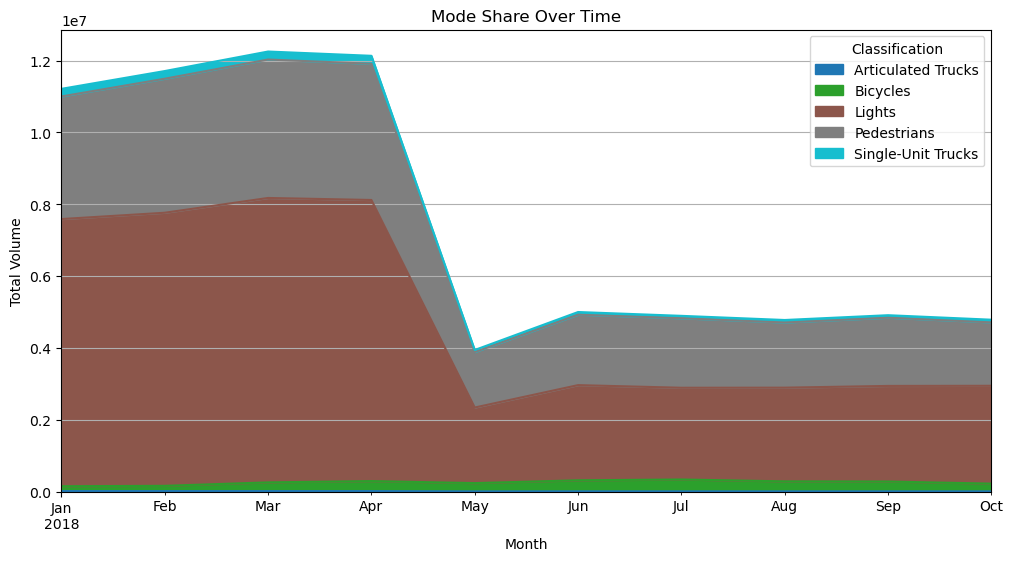

In [5]:
import seaborn as sns

# Aggregate traffic volume by classification and month
mode_share = df.groupby(["aggregation_period", "classification"])["volume"].sum().reset_index()

# Pivot data for stacked area chart
mode_pivot = mode_share.pivot(index="aggregation_period", columns="classification", values="volume").fillna(0)

# Plot
mode_pivot.plot(kind="area", stacked=True, figsize=(12, 6), colormap="tab10")
plt.xlabel("Month")
plt.ylabel("Total Volume")
plt.title("Mode Share Over Time")
plt.legend(title="Classification")
plt.grid()
plt.show()


# Traffic Flow Patterns

This visualization analyzes the traffic volume by direction (dir) to see which directions are the busiest.

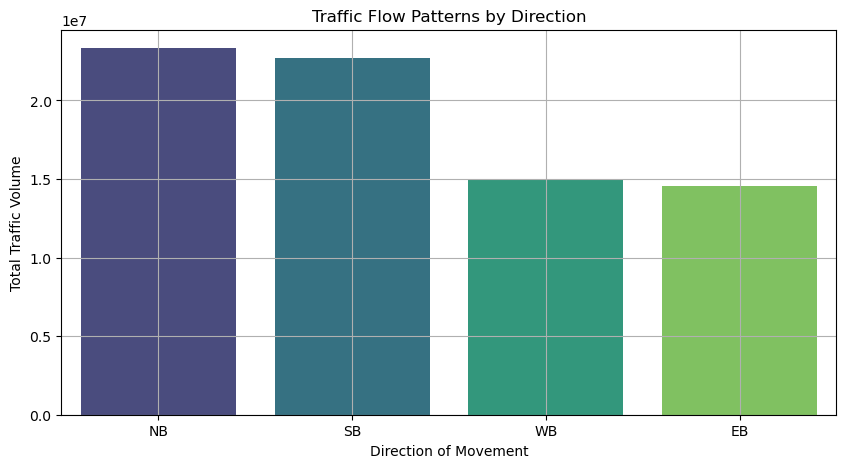

In [6]:
# Aggregate traffic volume by direction
traffic_by_direction = df.groupby("dir")["volume"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=traffic_by_direction.index, y=traffic_by_direction.values, palette="viridis")
plt.xlabel("Direction of Movement")
plt.ylabel("Total Traffic Volume")
plt.title("Traffic Flow Patterns by Direction")
plt.grid()
plt.show()


# Traffic Flow Patterns (Considering Approach Direction)

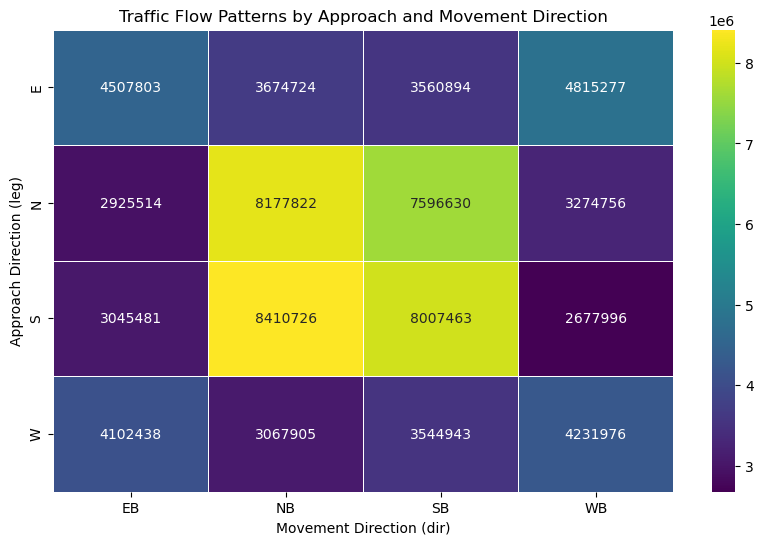

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate total volume by both approach direction (leg) and movement direction (dir)
traffic_flow = df.groupby(["leg", "dir"])["volume"].sum().unstack()

# Plot as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(traffic_flow, cmap="viridis", annot=True, fmt=".0f", linewidths=0.5)

plt.xlabel("Movement Direction (dir)")
plt.ylabel("Approach Direction (leg)")
plt.title("Traffic Flow Patterns by Approach and Movement Direction")
plt.show()


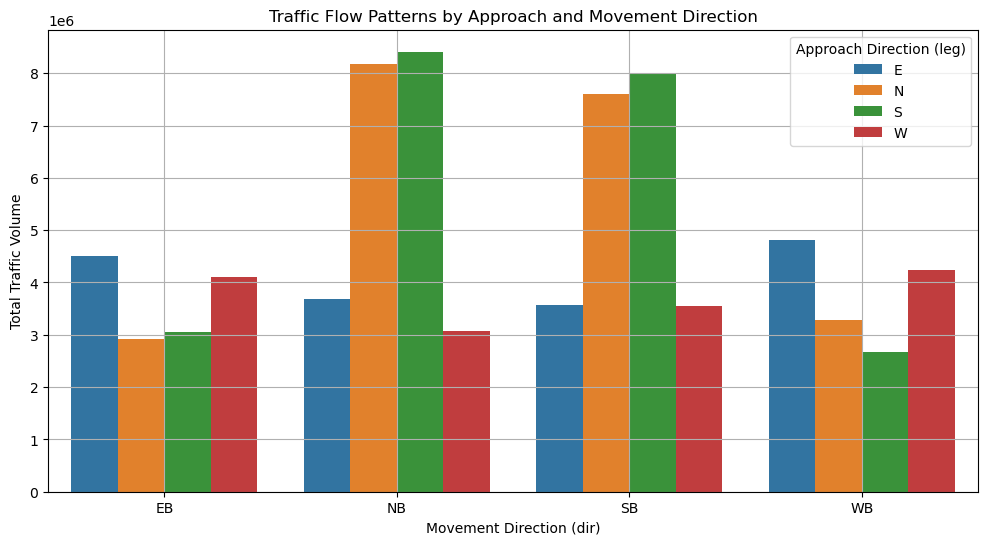

In [8]:
# Reset index for seaborn
traffic_flow_long = df.groupby(["leg", "dir"])["volume"].sum().reset_index()

# Plot as a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="dir", y="volume", hue="leg", data=traffic_flow_long, palette="tab10")

plt.xlabel("Movement Direction (dir)")
plt.ylabel("Total Traffic Volume")
plt.title("Traffic Flow Patterns by Approach and Movement Direction")
plt.legend(title="Approach Direction (leg)")
plt.grid()
plt.show()


# Rush Hour Analysis

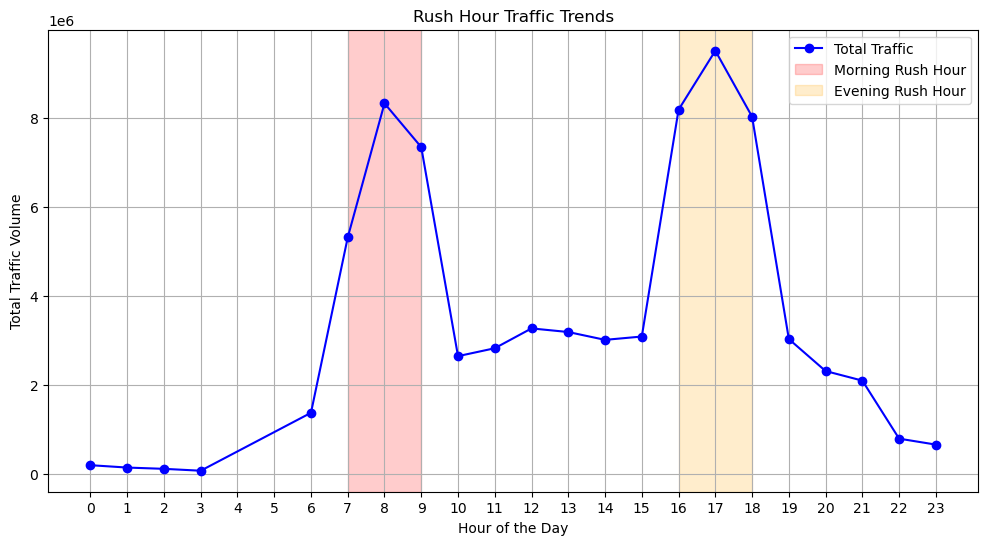

In [10]:
# Convert datetime_bin to datetime format if not already
df["datetime_bin"] = pd.to_datetime(df["datetime_bin"])

# Extract hour from timestamp
df["hour"] = df["datetime_bin"].dt.hour

# Define Rush Hour (7-9 AM & 4-6 PM)
rush_hour_morning = df[df["hour"].between(7, 9)]
rush_hour_evening = df[df["hour"].between(16, 18)]
rush_hour = pd.concat([rush_hour_morning, rush_hour_evening])

# Aggregate volume by hour
hourly_traffic = df.groupby("hour")["volume"].sum()

# 📈 Plot Hourly Traffic Trends
plt.figure(figsize=(12, 6))
plt.plot(hourly_traffic.index, hourly_traffic.values, marker="o", linestyle="-", color="b", label="Total Traffic")
plt.axvspan(7, 9, color="red", alpha=0.2, label="Morning Rush Hour")
plt.axvspan(16, 18, color="orange", alpha=0.2, label="Evening Rush Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Traffic Volume")
plt.title("Rush Hour Traffic Trends")
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.show()


## Vehicle Mode Share Over Time

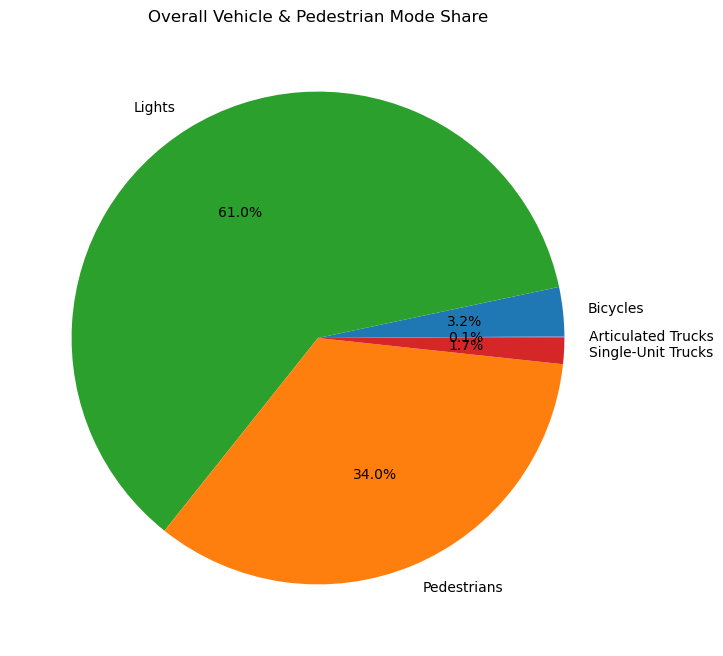

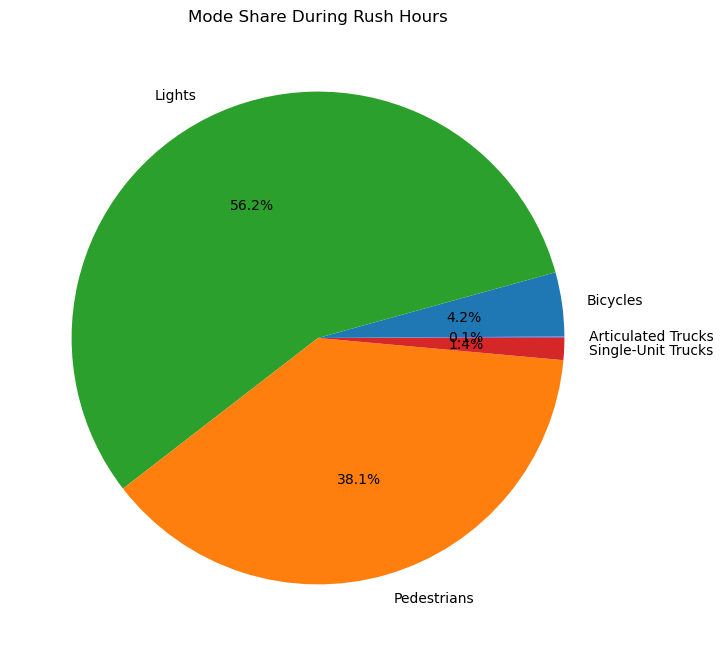

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a consistent color palette for vehicle classifications
class_colors = {
    "Bicycles": "#1f77b4",  # Blue
    "Pedestrians": "#ff7f0e",  # Orange
    "Lights": "#2ca02c",  # Green
    "Single-Unit Trucks": "#d62728",  # Red
    "Articulated Trucks": "#9467bd"  # Purple
}

# Aggregate total mode share (all time)
vehicle_mode_share = df.groupby("classification")["volume"].sum()

# 📊 Pie Chart for Overall Mode Share
plt.figure(figsize=(8, 8))
plt.pie(
    vehicle_mode_share, 
    labels=vehicle_mode_share.index, 
    autopct="%1.1f%%", 
    colors=[class_colors[label] for label in vehicle_mode_share.index]
)
plt.title("Overall Vehicle & Pedestrian Mode Share")
plt.show()

# Aggregate mode share during rush hours
rush_hour_mode_share = rush_hour.groupby("classification")["volume"].sum()

# 📊 Pie Chart for Rush Hour Mode Share
plt.figure(figsize=(8, 8))
plt.pie(
    rush_hour_mode_share, 
    labels=rush_hour_mode_share.index, 
    autopct="%1.1f%%", 
    colors=[class_colors[label] for label in rush_hour_mode_share.index]
)
plt.title("Mode Share During Rush Hours")
plt.show()


# Turning Movement Analysis

<Figure size 1200x600 with 0 Axes>

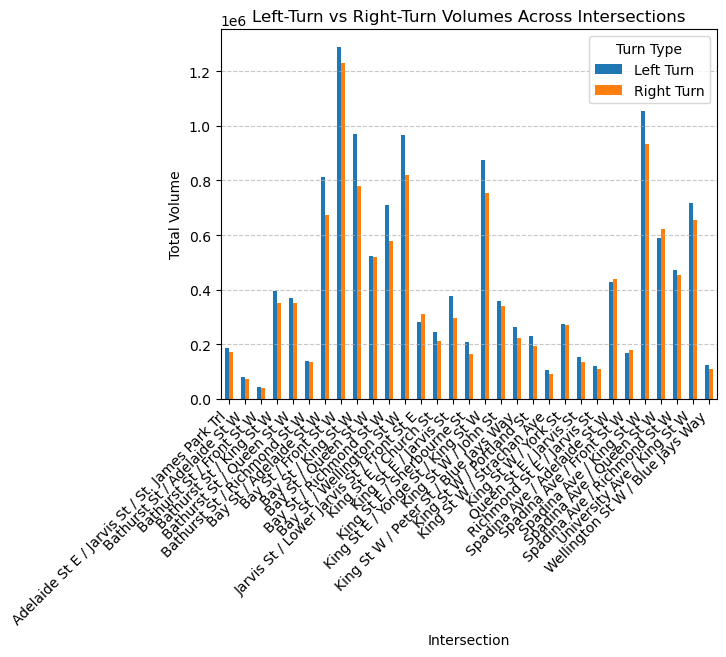

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define left-turn and right-turn conditions
left_turn_conditions = (
    (df["leg"] == "N") & (df["dir"] == "WB") |
    (df["leg"] == "S") & (df["dir"] == "EB") |
    (df["leg"] == "E") & (df["dir"] == "NB") |
    (df["leg"] == "W") & (df["dir"] == "SB")
)

right_turn_conditions = (
    (df["leg"] == "N") & (df["dir"] == "EB") |
    (df["leg"] == "S") & (df["dir"] == "WB") |
    (df["leg"] == "E") & (df["dir"] == "SB") |
    (df["leg"] == "W") & (df["dir"] == "NB")
)

# Filter left-turn and right-turn data
df["turn_type"] = "Other"
df.loc[left_turn_conditions, "turn_type"] = "Left Turn"
df.loc[right_turn_conditions, "turn_type"] = "Right Turn"

# Aggregate turn volumes by intersection
turn_volumes = df[df["turn_type"] != "Other"].groupby(["intersection_name", "turn_type"])["volume"].sum().unstack()

# Plot the left-turn vs right-turn comparison
plt.figure(figsize=(12, 6))
turn_volumes.plot(kind="bar", stacked=False, color=["#1f77b4", "#ff7f0e"])  # Blue for Left, Orange for Right
plt.xlabel("Intersection")
plt.ylabel("Total Volume")
plt.title("Left-Turn vs Right-Turn Volumes Across Intersections")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Turn Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Visualize U-Turn Trends

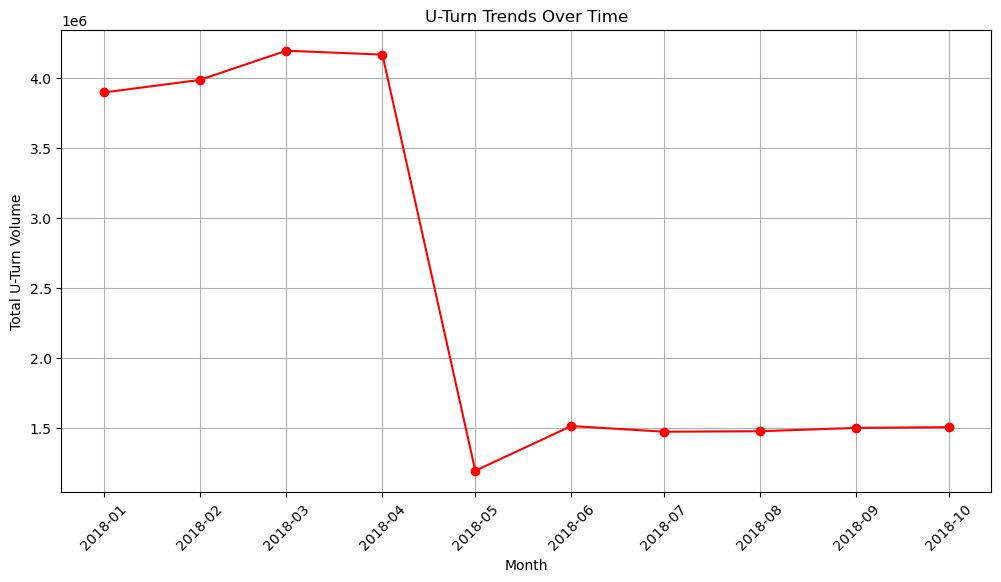

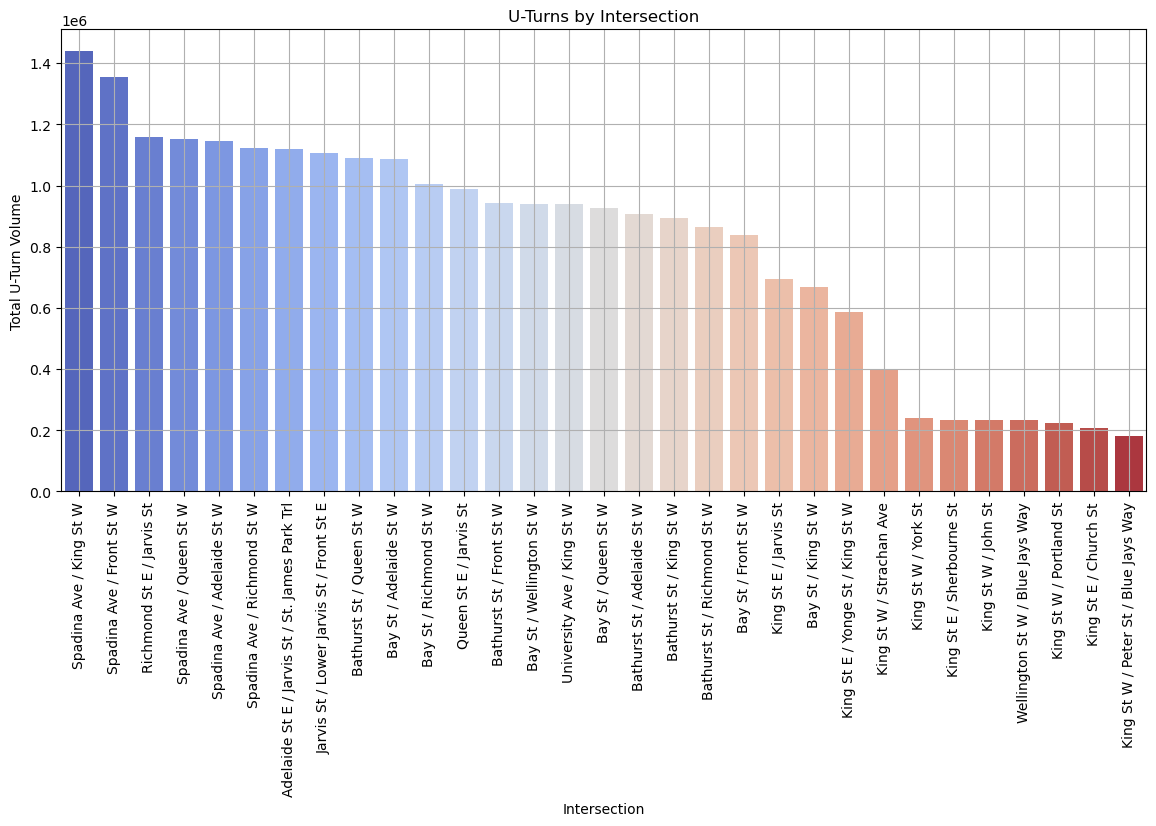

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter U-turns
u_turns = df[
    ((df["leg"] == "S") & (df["dir"] == "SB")) |
    ((df["leg"] == "N") & (df["dir"] == "NB")) |
    ((df["leg"] == "E") & (df["dir"] == "EB")) |
    ((df["leg"] == "W") & (df["dir"] == "WB"))
]

# Aggregate U-turns per month
u_turns_monthly = u_turns.groupby("aggregation_period")["volume"].sum()

# 📈 Plot U-Turns Over Time
plt.figure(figsize=(12, 6))
plt.plot(u_turns_monthly.index, u_turns_monthly.values, marker="o", linestyle="-", color="r")
plt.xlabel("Month")
plt.ylabel("Total U-Turn Volume")
plt.title("U-Turn Trends Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Aggregate U-turns per intersection
u_turns_intersection = u_turns.groupby("intersection_name")["volume"].sum().sort_values(ascending=False)

# 📊 Plot U-Turns by Intersection
plt.figure(figsize=(14, 6))
sns.barplot(x=u_turns_intersection.index, y=u_turns_intersection.values, palette="coolwarm")
plt.xlabel("Intersection")
plt.ylabel("Total U-Turn Volume")
plt.title("U-Turns by Intersection")
plt.xticks(rotation=90)
plt.grid()
plt.show()
